In [2]:
# StackOverflow Developer Survey - Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Setting display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Configure matplotlib and seaborn styles
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [7]:
# Load the dataset
print("\n1. Loading the dataset...")
df = pd.read_csv('../data/raw/survey_results_public.csv')
print("Dataset loaded successfully.")
print(f"Data set shape: {df.shape}")


1. Loading the dataset...
Dataset loaded successfully.
Data set shape: (49123, 170)


In [8]:
print("\n2. Initial Data Overview...")
print("-"*40)

print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]:,}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nColumn names:")
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. {col}")


2. Initial Data Overview...
----------------------------------------
Number of rows: 49,123
Number of columns: 170
Memory usage: 375.68 MB

Column names:
 1. ResponseId
 2. MainBranch
 3. Age
 4. EdLevel
 5. Employment
 6. EmploymentAddl
 7. WorkExp
 8. LearnCodeChoose
 9. LearnCode
10. LearnCodeAI
11. AILearnHow
12. YearsCode
13. DevType
14. OrgSize
15. ICorPM
16. RemoteWork
17. PurchaseInfluence
18. TechEndorseIntro
19. TechEndorse_1
20. TechEndorse_2
21. TechEndorse_3
22. TechEndorse_4
23. TechEndorse_5
24. TechEndorse_6
25. TechEndorse_7
26. TechEndorse_8
27. TechEndorse_9
28. TechEndorse_13
29. TechEndorse_13_TEXT
30. TechOppose_1
31. TechOppose_2
32. TechOppose_3
33. TechOppose_5
34. TechOppose_7
35. TechOppose_9
36. TechOppose_11
37. TechOppose_13
38. TechOppose_16
39. TechOppose_15
40. TechOppose_15_TEXT
41. Industry
42. JobSatPoints_1
43. JobSatPoints_4
44. JobSatPoints_5
45. JobSatPoints_6
46. JobSatPoints_7
47. JobSatPoints_8
48. JobSatPoints_9
49. JobSatPoints_10
50. JobSa

In [9]:
print("\n3. Data types and basic info...")
print("-"*40)
print("\nData types summary:")
print(df.dtypes.value_counts())

print(f"\nDetailed info:")
df.info()


3. Data types and basic info...
----------------------------------------

Data types summary:
object     119
float64     50
int64        1
Name: count, dtype: int64

Detailed info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Columns: 170 entries, ResponseId to JobSat
dtypes: float64(50), int64(1), object(119)
memory usage: 63.7+ MB


In [10]:
# Missing data analysis
print("\n4. Missing data analysis...")
print("-"*40)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Percentage', ascending=False)

print("Top 20 columns with most missing values:")
print(missing_df.head(20))


4. Missing data analysis...
----------------------------------------
Top 20 columns with most missing values:
                                    Column  Missing_Count  Missing_Percentage
AIAgentObsWrite            AIAgentObsWrite          48859           99.462574
SOTagsWant Entry          SOTagsWant Entry          48693           99.124646
SOTagsHaveEntry            SOTagsHaveEntry          48666           99.069682
AIModelsWantEntry        AIModelsWantEntry          48649           99.035075
AIAgentOrchWrite          AIAgentOrchWrite          48646           99.028968
JobSatPoints_15_TEXT  JobSatPoints_15_TEXT          48459           98.648291
AIAgentKnowWrite          AIAgentKnowWrite          48358           98.442685
AIModelsHaveEntry        AIModelsHaveEntry          48348           98.422328
SO_Actions_15_TEXT      SO_Actions_15_TEXT          48300           98.324614
AIAgentExtWrite            AIAgentExtWrite          48265           98.253364
CommPlatformWantEntr  CommPlatf

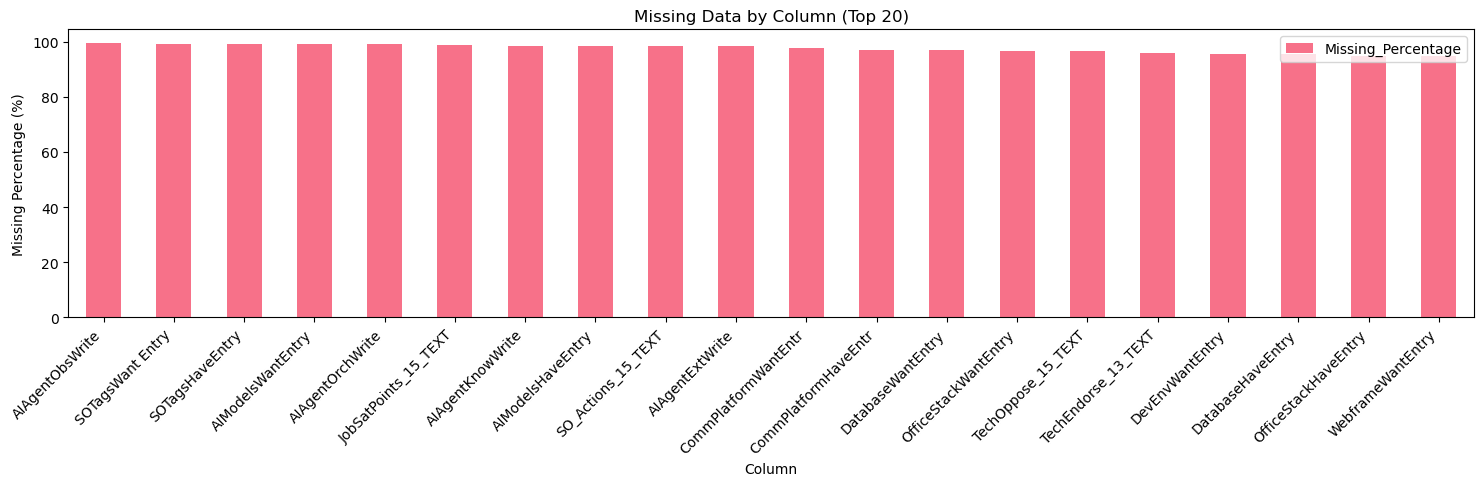

In [11]:
# Visualize missing data
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
missing_df.head(20).plot(x='Column', y='Missing_Percentage', kind='bar', 
                         title='Missing Data by Column (Top 20)', ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.ylabel('Missing Percentage (%)')
plt.tight_layout()
plt.show()

In [13]:
# Numerical columns analysis
print("\n5. Numerical columns analysis...")
print("-"*40)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"numerical columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f" - {col}")
    
if numerical_cols:
    print(f"\nBasic stats for numerical columns:")
    print(df[numerical_cols].describe())


6. Numerical columns analysis...
----------------------------------------
numerical columns (51):
 - ResponseId
 - WorkExp
 - YearsCode
 - TechEndorse_1
 - TechEndorse_2
 - TechEndorse_3
 - TechEndorse_4
 - TechEndorse_5
 - TechEndorse_6
 - TechEndorse_7
 - TechEndorse_8
 - TechEndorse_9
 - TechEndorse_13
 - TechOppose_1
 - TechOppose_2
 - TechOppose_3
 - TechOppose_5
 - TechOppose_7
 - TechOppose_9
 - TechOppose_11
 - TechOppose_13
 - TechOppose_16
 - TechOppose_15
 - JobSatPoints_1
 - JobSatPoints_4
 - JobSatPoints_5
 - JobSatPoints_6
 - JobSatPoints_7
 - JobSatPoints_8
 - JobSatPoints_9
 - JobSatPoints_10
 - JobSatPoints_11
 - JobSatPoints_13
 - JobSatPoints_14
 - JobSatPoints_15
 - JobSatPoints_16
 - ToolCountWork
 - ToolCountPersonal
 - CompTotal
 - SO_Actions_1
 - SO_Actions_16
 - SO_Actions_3
 - SO_Actions_4
 - SO_Actions_5
 - SO_Actions_6
 - SO_Actions_9
 - SO_Actions_7
 - SO_Actions_10
 - SO_Actions_15
 - ConvertedCompYearly
 - JobSat

Basic stats for numerical columns:
     

In [14]:
# Categorical columns analysis
print("\n6. Categorical columns analysis...")
print("-"*40)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Catergorical columns ({len(categorical_cols)}):")
for i, col in enumerate(categorical_cols[:10]):
    print(f" - {col}")
if len(categorical_cols) > 10:
    print(f" ... and {len(categorical_cols) - 10} more.")
    
if categorical_cols:
    print(f"\nSample of categorical data (first 5 columns):")
    for col in categorical_cols[:5]:
        unique_count = df[col].nunique()
        print(f"\n{col}:")
        print(f"  Unique values: {unique_count}")
        if unique_count <= 10:
            print(f"  Values: {df[col].value_counts().to_dict()}")
        else:
            print(f"  Top 5 values: {df[col].value_counts().head().to_dict()}")


7. Categorical columns analysis...
----------------------------------------
Catergorical columns (119):
 - MainBranch
 - Age
 - EdLevel
 - Employment
 - EmploymentAddl
 - LearnCodeChoose
 - LearnCode
 - LearnCodeAI
 - AILearnHow
 - DevType
 ... and 109 more.

Sample of categorical data (first 5 columns):

MainBranch:
  Unique values: 6
  Values: {'I am a developer by profession': 37418, 'I am not primarily a developer, but I write code sometimes as part of my work/studies': 4888, 'I am learning to code': 2580, 'I code primarily as a hobby': 1920, 'I used to be a developer by profession, but no longer am': 1322, 'I work with developers or my work supports developers but am not a developer by profession': 995}

Age:
  Unique values: 7
  Values: {'25-34 years old': 16485, '35-44 years old': 13232, '18-24 years old': 9195, '45-54 years old': 6265, '55-64 years old': 2626, '65 years or older': 942, 'Prefer not to say': 378}

EdLevel:
  Unique values: 8
  Values: {'Bachelor’s degree (B.A., 

In [15]:
# Identifying potential target variables from looking at the data
print("\n7. Potential target variables...")
print("-"*40)

potential_targets = [
    'ConvertedCompYearly',
    'ConvertedComp',
    'CompTotal',
    'Salary',
    'JobSat',
    'JobSatisfaction',
    'CareerSat',
    'YearsCode',
    'YearsCodePro',
    'WorkExp',
    'RemoteWork',
    'Employment'
]

print("Searching for common target variables in the dataset...")
found_targets = []
for target in potential_targets:
    if target in df.columns:
        found_targets.append(target)
        missing_pct = (df[target].isnull().sum() / len(df)) * 100
        print(f"{target}: {missing_pct:.1f}% missing")

if not found_targets:
    print("No common target variables found.")


7. Potential target variables...
----------------------------------------
Searching for common target variables in the dataset...
ConvertedCompYearly: 51.3% missing
CompTotal: 49.4% missing
JobSat: 45.8% missing
YearsCode: 12.5% missing
WorkExp: 12.8% missing
RemoteWork: 31.3% missing
Employment: 1.7% missing


In [16]:
print("\n" + "="*60)
print("Initial exploratory data analysis completed.")
print("="*60 + "\n")


Initial exploratory data analysis completed.

